In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2023-07-13 07:55:43--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  35.1MB/s    in 14s     

2023-07-13 07:55:58 (29.7 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [ ]:
!unzip -qq -o Food-5K.zip

In [ ]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [ ]:
!mv Food-5K/* .

In [2]:
!ls training

'ls' is not recognized as an internal or external command,
operable program or batch file.


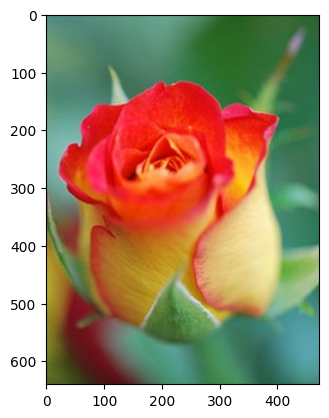

In [3]:
plt.imshow(image.load_img("training/0_808.jpg"));

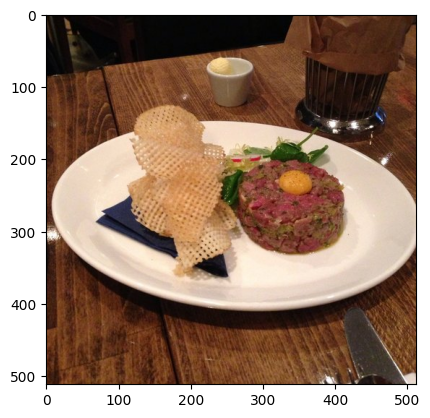

In [4]:
plt.imshow(image.load_img("training/1_123.jpg"));

In [ ]:
!mkdir data

In [ ]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

Move the images

In [ ]:
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

In [5]:
train_path = 'data/train'
valid_path = 'data/test'

These images are pretty big and of different sizes

Let's load them all in as the same (smaller) size

In [6]:
IMAGE_SIZE = [200, 200]

Useful for getting number of files

In [7]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

Useful for getting number of classes


In [8]:
folders = glob(train_path + '/*')
folders

['data/train\\food', 'data/train\\nonfood']

Look at an random image

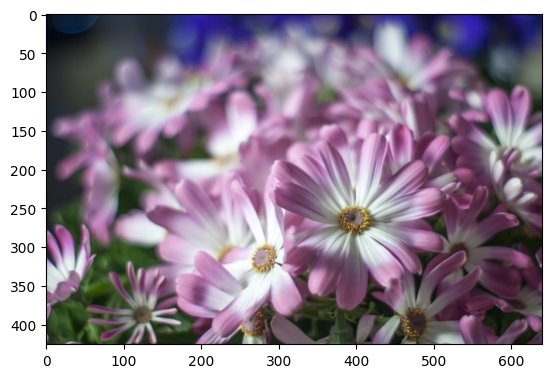

In [9]:
plt.imshow(image.load_img(np.random.choice(image_files)));

In [10]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False
)

58889256/58889256 [==============================] - 3s 0us/step


Map the data into feature vectors

In [11]:
x = Flatten()(ptm.output)

Create a model object

In [12]:
model = Model(inputs=ptm.input, outputs=x)

View the structure of the model

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

Create an instance of ImageDataGenerator

In [14]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

Create generators

In [15]:
batch_size = 128

train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

# Figure out the ouput size
feat = model.predict(np.random.random([1] + IMAGE_SIZE + [3]))
D = feat.shape[1]

X_train = np.zeros((Ntrain, D))
Y_train = np.zeros((Ntrain))
X_valid = np.zeros((Nvalid, D))
Y_valid = np.zeros((Nvalid))

1/1 [==============================] - 0s 408ms/step


Populate X_train and Y_train

In [17]:
i = 0
for x, y in train_generator:
  # get features
  features = model.predict(x)

  # size of the batch (may not always be batch_size)
  sz = len(y)

  # assign to X_train and Y_train
  X_train[i:i+sz] = features
  Y_train[i:i+sz] = y

  # increment i
  i += sz
  print(i)

  if i >= Ntrain:
    print("breaking now")
    break
print(i)

4/4 [==============================] - 23s 6s/step
128
4/4 [==============================] - 28s 8s/step
256
4/4 [==============================] - 28s 7s/step
384
4/4 [==============================] - 29s 7s/step
512
4/4 [==============================] - 27s 7s/step
640
4/4 [==============================] - 28s 7s/step
768
4/4 [==============================] - 29s 7s/step
896
4/4 [==============================] - 29s 7s/step
1024
4/4 [==============================] - 30s 8s/step
1152
4/4 [==============================] - 31s 8s/step
1280
4/4 [==============================] - 33s 8s/step
1408
4/4 [==============================] - 35s 9s/step
1536
4/4 [==============================] - 40s 11s/step
1664
4/4 [==============================] - 38s 10s/step
1792
4/4 [==============================] - 40s 10s/step
1920
4/4 [==============================] - 42s 11s/step
2048
4/4 [==============================] - 46s 12s/step
2176
4/4 [==============================] - 52s 13s/ste

Populate X_valid and Y_valid

In [19]:
i = 0
for x, y in valid_generator:
  # get features
  features = model.predict(x)

  # size of the batch (may not always be batch_size)
  sz = len(y)

  # assign to X_valid and Y_valid
  X_valid[i:i+sz] = features
  Y_valid[i:i+sz] = y

  # increment i
  i += sz
  print(i)

  if i >= Nvalid:
    print("breaking now")
    break
print(i)

4/4 [==============================] - 20s 5s/step
128
4/4 [==============================] - 27s 7s/step
256
4/4 [==============================] - 28s 7s/step
384
4/4 [==============================] - 33s 9s/step
512
4/4 [==============================] - 33s 8s/step
640
4/4 [==============================] - 34s 9s/step
768
4/4 [==============================] - 40s 9s/step
872
4/4 [==============================] - 45s 11s/step
1000
breaking now
1000


In [20]:
X_train.max(), X_train.min()

(641.507568359375, 0.0)

Normalize the data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

Try to built-in logistic regression|

In [22]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train2, Y_train)
print(logr.score(X_train2, Y_train))
print(logr.score(X_valid2, Y_valid))

1.0
0.977


Do logistic regression in Tensorflow

In [23]:
i = Input(shape=(D,))
x = Dense(1, activation='sigmoid')(i)
linearmodel = Model(i, x)

Compile the model

In [24]:
linearmodel.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Can try on both normalized and unnormalized data

In [25]:
r = linearmodel.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    epochs=10, batch_size=batch_size
)

Epoch 1/10
24/24 [==============================] - 1s 21ms/step - loss: 0.7466 - accuracy: 0.9417 - val_loss: 0.3651 - val_accuracy: 0.9730
Epoch 2/10
24/24 [==============================] - 0s 8ms/step - loss: 0.0266 - accuracy: 0.9967 - val_loss: 0.4175 - val_accuracy: 0.9720
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 8.3416e-04 - accuracy: 0.9997 - val_loss: 0.3227 - val_accuracy: 0.9760
Epoch 4/10
24/24 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.3507 - val_accuracy: 0.9740
Epoch 5/10
24/24 [==============================] - 0s 7ms/step - loss: 4.6457e-04 - accuracy: 0.9997 - val_loss: 0.2905 - val_accuracy: 0.9780
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 1.5229e-06 - accuracy: 1.0000 - val_loss: 0.2560 - val_accuracy: 0.9770
Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 4.6630e-06 - accuracy: 1.0000 - val_loss: 0.2547 - val_accuracy: 0.9770
Epo

Loss per iteration

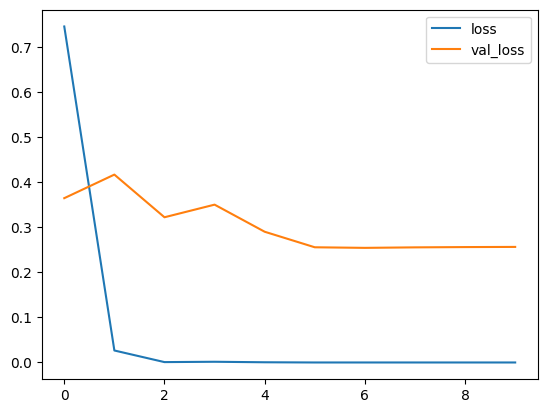

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

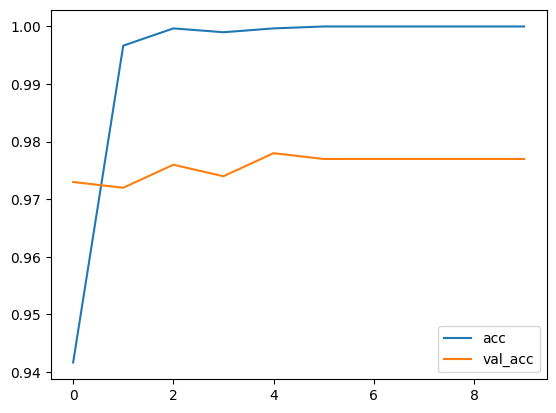

In [27]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();